In [248]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [260]:
#Question 1 B
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = pd.read_csv("sales_data.csv")
df = pd.DataFrame(data)

In [67]:
df.head(5)

,Date,Store,Product,Quantity,Price_per_unit,Revenue
0,01-11-2024,Store_C,Product_2,33,43.29,1428.57
1,29-01-2024,Store_D,Product_2,42,47.10,1978.20
2,21-03-2024,Store_A,Product_4,44,40.34,1774.96
3,26-09-2024,Store_C,Product_2,24,35.10,842.40
4,14-04-2024,Store_C,Product_2,15,31.13,466.95


In [103]:
# le = LabelEncoder()
# le.fit_transform(df['Product'])

array([1, 1, 3, 1, 1, 3, 3, 0, 4, 4, 1, 4, 1, 0, 3, 3, 3, 4, 0, 4, 4, 0,
       0, 0, 0, 3, 2, 2, 0, 2, 2, 0, 2, 4, 1, 1, 0, 3, 0, 3, 1, 0, 4, 2,
       3, 2, 2, 0, 2, 4, 2, 0, 4, 1, 2, 0, 1, 1, 3, 4, 2, 0, 3, 4, 3, 4,
       4, 2, 4, 3, 4, 2, 2, 3, 1, 1, 4, 0, 4, 3, 3, 3, 3, 3, 2, 1, 3, 0,
       0, 0, 0, 2, 0, 3, 4, 0, 2, 2, 0, 4])

Store
Store_A    Axes(0.125,0.11;0.775x0.77)
Store_B    Axes(0.125,0.11;0.775x0.77)
Store_C    Axes(0.125,0.11;0.775x0.77)
Store_D    Axes(0.125,0.11;0.775x0.77)
Name: Revenue, dtype: object

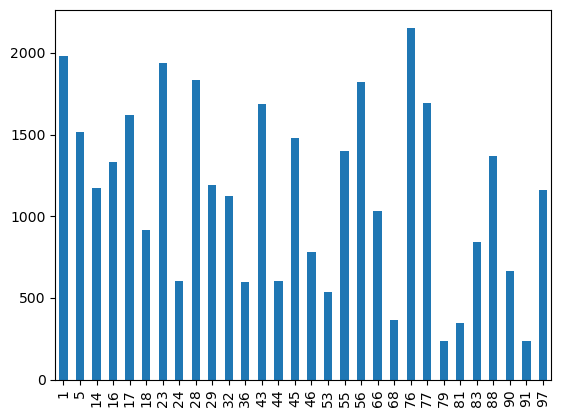

In [92]:
#BarPlot
df1 =df[['Revenue'].groupby(by =df['Store'])
#f1 =df.groupby(by = df['Store'])
#n.barplot(data=df1,x = 'Store',y ='Revenue')
#ns.barplot(data=df,x = 'Store',y = df['Revenue'].groupby(by =df['Store']))
df1.plot(kind="bar",x = 'Store',y = 'Revenue')

<Axes: xlabel='Date'>

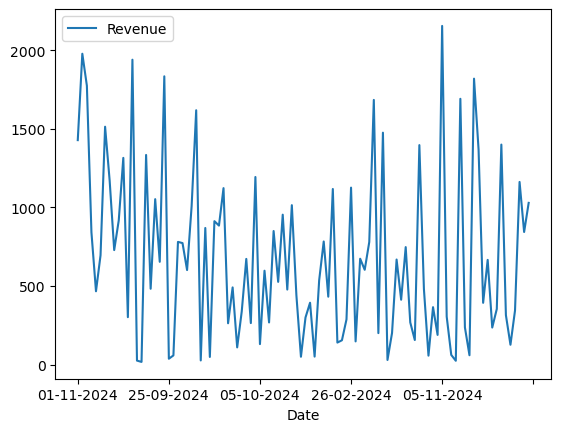

In [81]:
df.plot(kind = "line",x = 'Date',y = 'Revenue')

<Axes: ylabel='Revenue'>

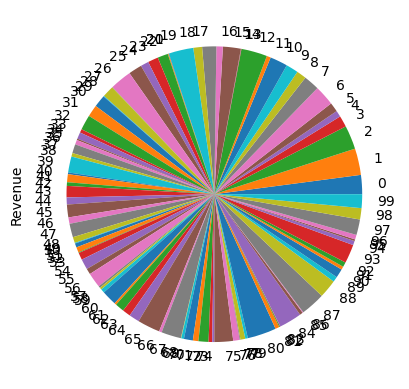

In [104]:
df.plot(kind ="pie",x = 'Product', y = 'Revenue',legend = '')

In [110]:
#Question 2 B
df.isnull().sum()

Date              0
Store             0
Product           0
Quantity          0
Price_per_unit    0
Revenue           0
dtype: int64

In [152]:
price =df[['Price_per_unit','Product']].groupby(by = 'Product')

In [160]:
df['Quantity'].gt(30)

0      True
1      True
2      True
3     False
4     False
      ...  
95    False
96    False
97    False
98     True
99    False
Name: Quantity, Length: 100, dtype: bool

In [188]:
import numpy as np
Discount_Price = np.array([10]*99)
DP = pd.DataFrame(Discount_Price)
df.add('DP',axis = '1')


ValueError: No axis named 1 for object type DataFrame

In [190]:
df['Date'].lt(6)

In [192]:
##Question 4 B

class Animal:
    def speak(self):
        print("In Animal")
        
class Dog(Animal):
    def speak(self):
        print("Woof")

class Cat(Animal):
    def speak(self):
        print("Meow")
    
def talk(obj):
    obj.speak()
    
cat = Cat()
dog = Dog()

talk(dog)
talk(cat)
    

Woof
Meow


In [194]:
##Question 5
datas = pd.read_csv('linear_regression_dataset.csv')
d = pd.DataFrame(data = datas)

In [196]:
d.head(5)

,Advertising_Budget (in $1000),Sales (in $1000)
0,56,90.718091
1,97,141.684799
2,19,35.120420
3,76,117.074589
4,65,99.115390


<Axes: >

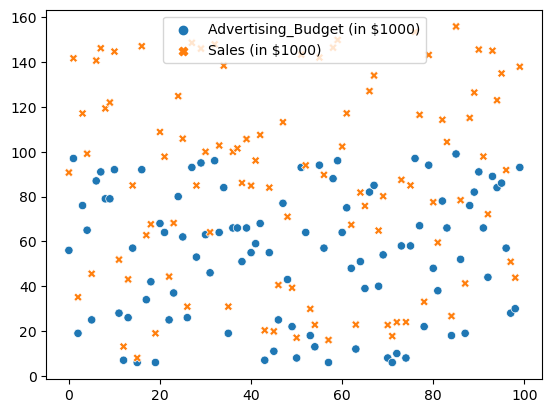

In [257]:
sns.scatterplot(data=d)


In [225]:
x = d.drop(columns='Sales (in $1000)')
y = d.drop(columns='Advertising_Budget (in $1000)')

In [226]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [227]:
sc = StandardScaler()
sc.fit(x_train)
sc.fit(x_test)


StandardScaler()

In [244]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [241]:
y_pred = model.predict(x_test)
y_pred

array([[ 99.0938243 ],
       [117.04861122],
       [100.59005655],
       [ 88.62019861],
       [ 16.80105096],
       [ 63.18425048],
       [ 42.23699908],
       [ 15.30481872],
       [ 37.74830235],
       [ 33.25960563],
       [ 16.80105096],
       [ 84.13150188],
       [ 13.80858647],
       [143.98079158],
       [106.57498552],
       [ 16.80105096],
       [ 90.11643085],
       [ 87.12396636],
       [ 81.13903739],
       [149.96572055]])

In [246]:
accuracy = r2_score(y_test,y_pred)
accuracy

0.9892297094931443

In [253]:
error = mean_squared_error(y_test,y_pred)
error

19.14121648162902

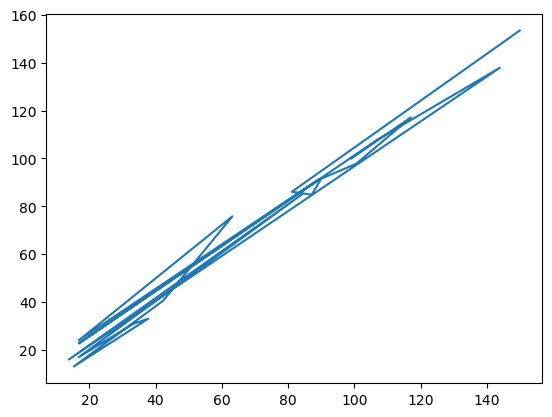

In [264]:
plt.plot(y_pred,y_test)

In [270]:
import joblib as jb

In [ ]:
jb.load('model.pkl')